### Objective 
* Classify new patient survives more than five years or dies within five years of breast operation based on three features(age,year,nodes).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read csv file and assign it to pandas Dataframe
survival_df=pd.read_csv('../input/haberman.csv')

In [5]:
survival_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
#Have a look at total rows in data along with datatype of features and number of non-null/null points in each coloumn.
survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
#Find number of rows and coloumns.
survival_df.shape

(306, 4)

In [8]:
#FInd name of all features
survival_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
#High level statistics of given data
survival_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* There are total ** 306 ** data points and four coloumns ** age **,** year **,** nodes **,** status **.
* ** 10 years(1958 to 1969) ** of Data has age group of patients from ** 30 to 83 **.
* ** 75% ** of patients has less than ** 5 ** nodes and ** 25% ** of patient have no nodes. 

In [10]:
sur = survival_df.loc[survival_df.status==1]  #dataframe of patients who survived
sur_no = survival_df.loc[survival_df.status==2]#dataframe of patients who do not survived after five years.
print(sur.describe())
print(sur_no.describe())

              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


* The average number of ** nodes ** for patient who survived is approximately ** 3 **.
* The average number of ** nodes ** for patient who did not survived after five years is approximately ** 7 **.

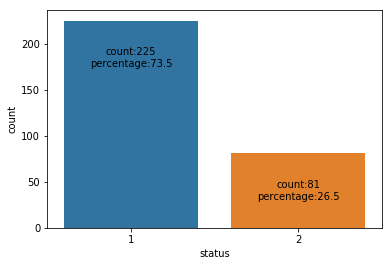

In [11]:
#Check if given data is balanced or imbalanced.
ax=sns.countplot(survival_df.status)
total=float(len(survival_df))
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 50,
            'count:'+'{:1}'.format(height)+'\npercentage:{:1.1f}'.format((height*100)/total),
            ha="center")
#survival_df.status.value_counts(normalize=True)

 **Imbalance dataset**
 * Approximately 73% of patient survived after operation and ~26% of patients dies after operation.

# Now we will try to have insights on data using various plots.

## Pair Plot ##

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


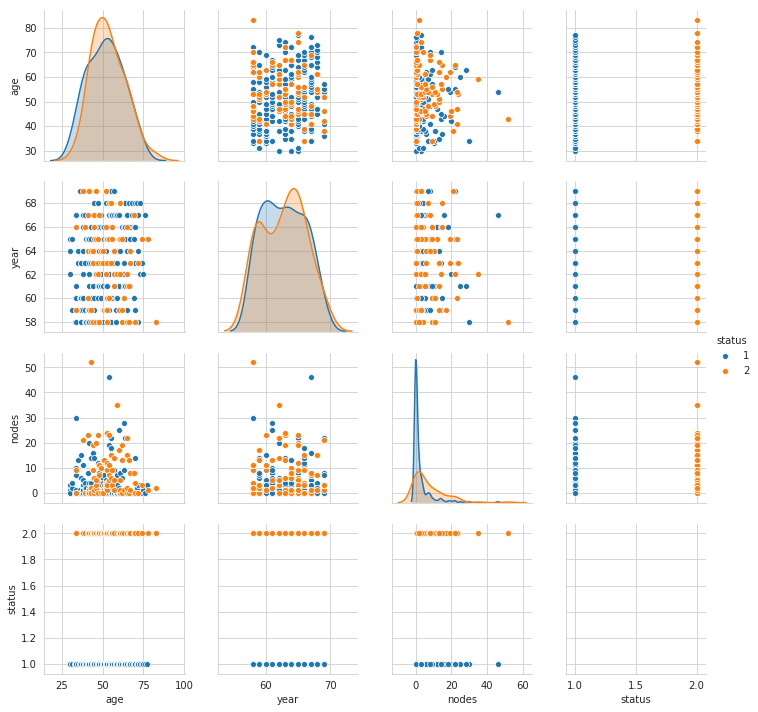

In [12]:
sns.set_style('whitegrid')
#df = survival_df[['age','year','nodes']]
sns.pairplot(survival_df,hue='status')

* Younger patients with ** age group 30 to 40 ** and number of detected ** nodes between 0 to 8 ** are more likely to survive for more than 5 years of operation. (can be concluded based on ** node ** vs ** age **graph).
* There is so much overlapping thus none of the scatter plot is lineraly seperable.

### Finding Histogram and PDF of each independent variables. ### 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


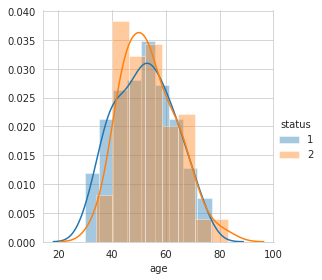

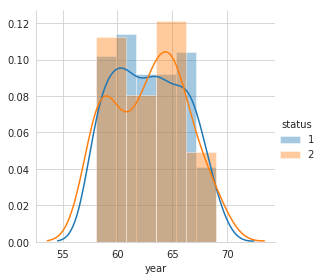

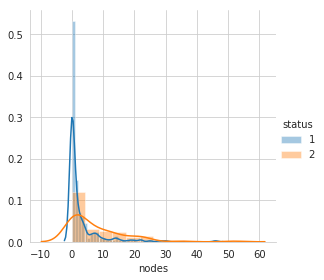

In [13]:
#fig,axes = plt.subplots(figsize=(18,4),nrows=1,ncols=3)
#plt.tight_layout()
#sns.distplot(survival_df.age,ax=axes[0])
#How to plot 3 distplot on same row using Facetgrid?(Doubt)
sns.set_style('whitegrid')
g0 = sns.FacetGrid(survival_df,hue='status',size=4).map(sns.distplot,'age',).add_legend()
g1 = sns.FacetGrid(survival_df,hue='status',size=4).map(sns.distplot,'year').add_legend()
g2 = sns.FacetGrid(survival_df,hue='status',size=4).map(sns.distplot,'nodes').add_legend()
plt.show()

* The chances of survival after age of ** 77 ** years is about ** ~0% **.
* The chances of survival before age of ** 34 ** years is about 100%. 
* Chances of death is reduced after 1965 compare to previous years (1958 to 1965).
* Here one can notice that if total nodes lies between 0 to 5 chances of survival after five years is high and as the number of nodes detected increases survival chance gradually decreases.

In [ ]:
survival_df.loc[(survival_df.nodes>=0) & (survival_df.nodes<=4)].status.value_counts(normalize=True)

* Approximately ** 82% ** of patients having less than 5 nodes survived for more than five years after operation.

# PDF and CDF

### PDF & CDF of patients who survived 

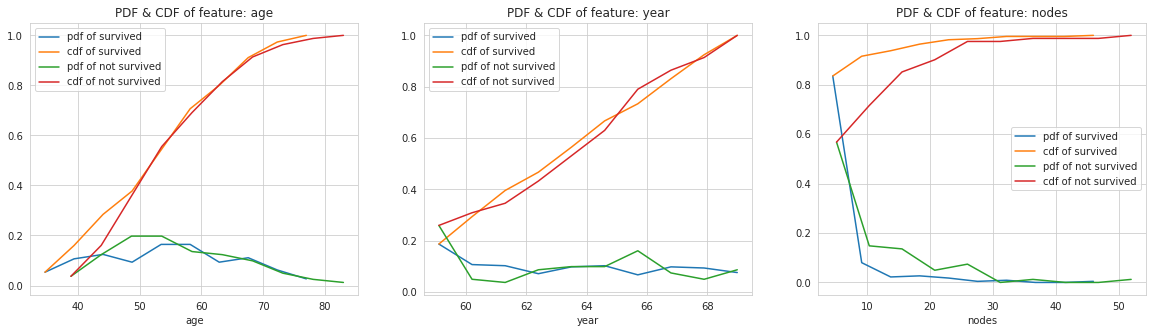

In [14]:
plt.figure(figsize=(20,5))
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
for idx,coloumn  in enumerate(list(survival_df.columns[:-1])):
    plt.subplot(1,3,idx+1)
    counts,bin_edges = np.histogram(sur[coloumn],bins=10,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    counts,bin_edges = np.histogram(sur_no[coloumn],bins=10,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.title("PDF & CDF of feature: "+coloumn)
    plt.xlabel(coloumn)
    plt.legend(label)
    

* ~95% of patient who survived are less than equal to the age of 70.
* For third plot, sharp decrease(from ~83% to ~9%) in percentage of nodes detected from 0 to ~8, implies that having less number nodes in patient is very crucial for her survival.
* Patient having more than 46 nodes has ~0.01% chance of survival. (based on pdf and cdf of nodes)
* Patient with age more than 77 has around 0% chance of survival. (based on pdf and cdf of age)
* Patients who has been diagonsed between 1965 to 1967 were more likely to die compare to patient who has been diagonsed before 1965 and after 1967.(based on pdf and cdf of year)

# Box Plot

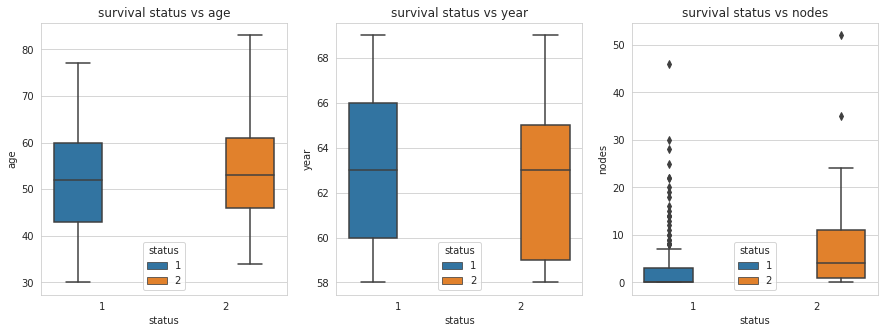

In [15]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
for idx,feature in enumerate(list(survival_df.columns)[:-1]):
    sns.boxplot(x='status',y=feature,data=survival_df,ax=axes[idx],hue='status').set_title('survival status vs '+feature)
plt.show()

# Violin Plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


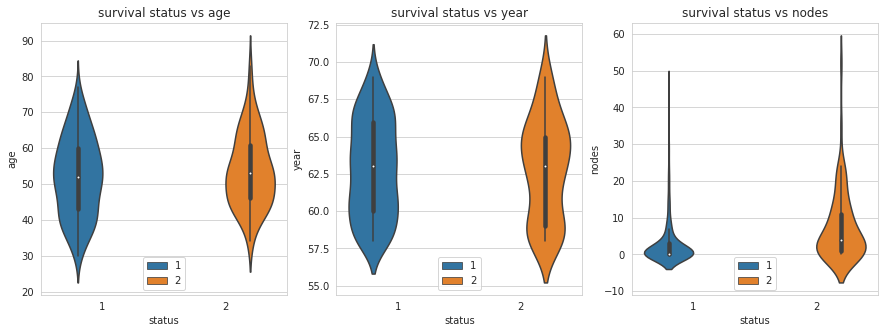

In [16]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
for idx,feature in enumerate(list(survival_df.columns)[:-1]):
    sns.violinplot(x='status',y=feature,data=survival_df,ax=axes[idx],hue='status').set_title('survival status vs '+feature)
    axes[idx].legend(loc='lower center')
#plt.legend(loc='best')    
plt.show()

## Conclusion
* Haberman dataset is ** imbalanced dataset ** as dependent variable ** 'status' ** has not equal number of data points of each class (1 or 2) 
* Since there is too much overlapping in data points, it is difficult to create simple linearly seperable model to predict outcome for new patients.
* Only number of nodes detected in patient somehow gives strong intution in dataset.
* It is not possible to write working if/else code to classify patient in one of two categories for this dataset